Nowadays, the role of a tutor is more important than ever to prevent students dropout and improve their academic performance. This work proposes a data-driven system to extract relevant information hidden in the student academic data and, thus, help tutors to offer their pupils a more proactive personal guidance. In particular, our system, based on machine learning techniques, makes predictions of dropout intention and courses grades of students, as well as personalized course recommendations. Moreover, we present different visualizations which help in the interpretation of the results. In the experimental validation, we show that the system obtains promising results with data from the degree studies in Law, Computer Science and Mathematics

4,434 takes courses
e clean the data according to the following three criteria:
• Students with 5 or more missing values in an academic year are removed from the original
data set.
• Students with a mean grade inferior to 2 points out of 10 in an academic year are removed
from the original data set.
• Students who do not follow the standard enrollment procedure are removed from the data
set. For instance, a student who enrolls to more than 10 courses in an academic year falls in
this category

train 5 classifiers: Logistic Regression (LR) [7], Gaussian Naive
Bayes (GB) [8], Support Vector Machine (SVM) [9], Random Forest (RF)

sigmoid function Naive Bayes Classifier (NB) is a conditional probability model based in Bayes’ theorem.
Given a n-dimensional feature vector Support Vector Machine (SVM) is a classifier based on the idea of separating data using hyper-planes. More specifically, it consider a set of n–dimensional feature vectors as points in the n–dimensional real euclidean space. 

tutor can benefit from knowing which courses from the
next academic year will be more difficult for a concrete student in order to offer useful enrollment guidance. we consider the problem of predicting future grades for a particular student given previous ones. 

Scikit-learn python library 
Small data set: non-parametric model such as NB or LR.
Larger data sets: parametric model like RF or XGBoosting.

Performing 5-fold cross-validation: 
MAE score
confusion matrix of hte students who had dropped out or not actually should to.
We prefer to give extra support to a student that would successfully pass a course without help than having the risk of missing a student in need of advice.

two most difficult courses for a student will be among the top 4 of the predicted ranking. The tutor can fairly advise the students to focus on the top 4 ranked courses.

Scatter plot and distribution visualizations of grade predictions—Mathematics. Predicted values against real values for second-year grades
for the degree in Mathematics. The dots are colored accordingly to the mean grade
obtained by the students in the previous academic year. The shaded regions correspond to acceptable errors. The histogram plots show the distributions
of the predicted grades (X-axis) and real grades (Y-axis).

Data-driven system to help tutors in the early detection of
dropout and the prediction of courses grade as well as courses ranking. 

F1 score of 82%, 76% and 61% for the degrees in Computer Science, Law and Mathematics.
Recommender system is able to accurately predict the grade with an mean absolute error of 1.21, 1.32 and 1.34 for the degrees in Law, Computer Science
and Mathematics.
We have developed visualization tools to better understand the obtained results.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [3]:
path = r'data'

In [4]:
gpa = pd.read_csv("data/GPA_RawData.csv")

In [5]:
gpa.head()

StudentID  AcademicYearID               SchoolName  SchoolCode  GradeCode  \
0    5460134            2010    Roosevelt High School          17         12   
1    5460134            2010    Roosevelt High School          17         12   
2    5460142            2010    Roosevelt High School          17         12   
3    5460142            2010    Roosevelt High School          17         12   
4    5485818            2010  Nathan Hale High School          22         12   

  ELLServedFlag SpecialEducationFlag Section504Flag AAMFlag SOCFFEJFlag  ...  \
0             N                    Y              N       N           N  ...   
1             N                    Y              N       N           N  ...   
2             N                    Y              N       N           N  ...   
3             N                    Y              N       N           N  ...   
4             N                    Y              N       N           N  ...   

  HomeLanguageName PrimaryLanguageName   Race HC  AL  FRLOnOct01  GenderCode  \
0          English             English  White  0   0         0.0           M   
1          English             English  White  0   0         0.0           M   
2          English             English  Asian  0   0         1.0           M   
3          English             English  Asian  0   0         1.0           M   
4          English             English  White  0   0         0.0           F   

  StudentsAge  CumulativeGPADistrict  CumulativeCreditsEarned  
0          31                  4.000                     33.0  
1          31                  4.000                     36.0  
2          31                  3.747                     32.7  
3          31                  3.747                     35.7  
4          31                  4.000                     40.3  

[5 rows x 21 columns]

In [35]:
gpa.describe()

StudentID     SchoolYear     SchoolCode          Grade  \
count  8.193350e+05  819335.000000  819335.000000  819335.000000   
mean   7.004773e+06    2015.381579      85.689816      10.493290   
std    6.100920e+05       2.557727     207.414778       1.132967   
min    5.460134e+06    2010.000000      11.000000       9.000000   
25%    6.577902e+06    2013.000000      13.000000       9.000000   
50%    6.841605e+06    2016.000000      18.000000      10.000000   
75%    7.154677e+06    2018.000000      21.000000      12.000000   
max    8.170652e+06    2019.000000     983.000000      12.000000   

       HighlyCapable  AdvancedLearning  FreeReducedLunch            Age  \
count  819335.000000     819335.000000     818538.000000  819335.000000   
mean        0.067680          0.125941          0.406499      20.761275   
std         0.251197          0.331783          0.491180       2.928081   
min         0.000000          0.000000          0.000000      13.000000   
25%         0.000000          0.000000          0.000000      19.000000   
50%         0.000000          0.000000          0.000000      21.000000   
75%         0.000000          0.000000          1.000000      23.000000   
max         1.000000          1.000000          1.000000      32.000000   

                 GPA  CreditsEarned  
count  404370.000000  815620.000000  
mean        3.026931       6.663740  
std         0.722985       8.684439  
min         0.857000       0.000000  
25%         2.450000       0.000000  
50%         3.100000       0.500000  
75%         3.684000      12.700000  
max         4.000000      67.500000

In [36]:
gpa.columns =('StudentID','SchoolYear','SchoolName','SchoolCode','Grade','ELLServed','SpecialEducation','Section504Flag','AAM','SOCFFEJ','RemoteLearning','HomeLanguage','PrimaryLanguageName','Race','HighlyCapable','AdvancedLearning','FreeReducedLunch','Gender','Age','GPA','CreditsEarned')

In [59]:
gpa.shape

(819335, 21)

In [60]:
gpa1 = gpa.dropna()

In [70]:
gpa2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404204 entries, 0 to 819328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   StudentID            404204 non-null  int64  
 1   SchoolYear           404204 non-null  int64  
 2   SchoolName           404204 non-null  object 
 3   SchoolCode           404204 non-null  int64  
 4   Grade                404204 non-null  int64  
 5   ELLServed            404204 non-null  int64  
 6   SpecialEducation     404204 non-null  int64  
 7   Section504Flag       404204 non-null  int64  
 8   AAM                  404204 non-null  int64  
 9   SOCFFEJ              404204 non-null  int64  
 10  RemoteLearning       404204 non-null  object 
 11  HomeLanguage         404204 non-null  object 
 12  PrimaryLanguageName  404204 non-null  object 
 13  Race                 404204 non-null  int64  
 14  HighlyCapable        404204 non-null  int64  
 15  AdvancedLearning 

In [62]:
gpa2.isnull().sum()

StudentID              0
SchoolYear             0
SchoolName             0
SchoolCode             0
Grade                  0
ELLServed              0
SpecialEducation       0
Section504Flag         0
AAM                    0
SOCFFEJ                0
RemoteLearning         0
HomeLanguage           0
PrimaryLanguageName    0
Race                   0
HighlyCapable          0
AdvancedLearning       0
FreeReducedLunch       0
Gender                 0
Age                    0
GPA                    0
CreditsEarned          0
dtype: int64

In [41]:
gpa1.to_csv(r'data/gpa_data.csv')

In [69]:
gpa2 = gpa1.replace({'AAM': {'Y':1, 'N': 0},
            'SOCFFEJ': {'Y':1, 'N': 0},
            'ELLServed': {'Y':1, 'N': 0},
            'SpecialEducation':{'Y':1, 'N': 0},
            'Section504Flag':{'Y':1, 'N': 0},
            'Race':{'White':1, 'Black':2,'Asian':3, 'Hispanic':4, 'Pacific Islander':5,'American Indian':6, 'Multiracial':7},
            'SpecialEducation':{'Y':1, 'N': 0},       
            'Gender':{'F':0, 'M': 1, 'X':2}})

GPA hist

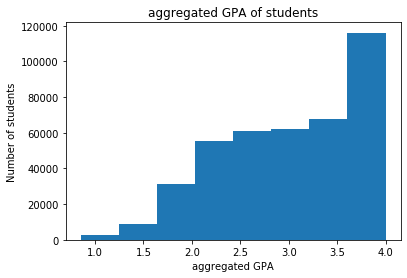

In [42]:
plt.hist(gpa2['GPA'], bins=8)
plt.title('aggregated GPA of students')
plt.xlabel('aggregated GPA')
plt.ylabel('Number of students')
plt.show()

In [ ]:
Boxplot of demographic info

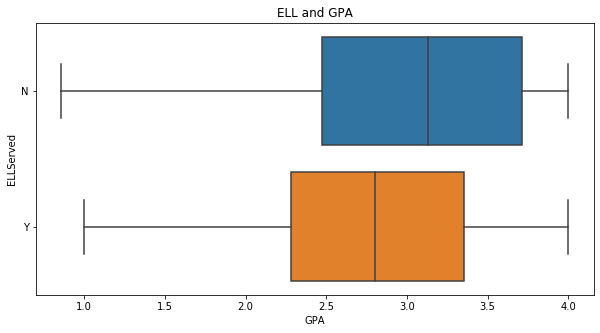

In [164]:
plt.figure(figsize=(10, 5))
plt.title("ELL and GPA")
sns.boxplot(y="ELLServed", x="GPA", data = gpa1)

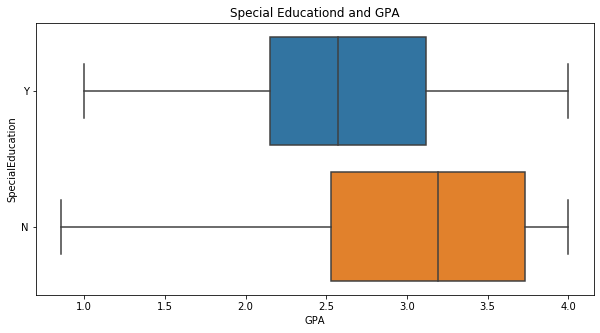

In [165]:
plt.figure(figsize=(10,5))
plt.title("Special Educationd and GPA")
sns.boxplot(y="SpecialEducation", x="GPA", data = gpa1)

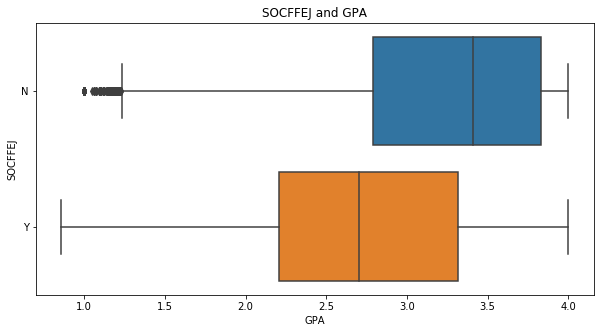

In [166]:
plt.figure(figsize=(10,5))
plt.title("SOCFFEJ and GPA")
sns.boxplot(y="SOCFFEJ", x="GPA", data = gpa1)

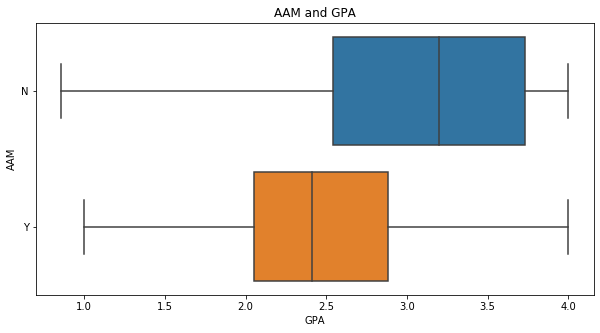

In [167]:
plt.figure(figsize=(10,5))
plt.title("AAM and GPA")
sns.boxplot(y="AAM", x="GPA", data = gpa1)

gender * age comparison

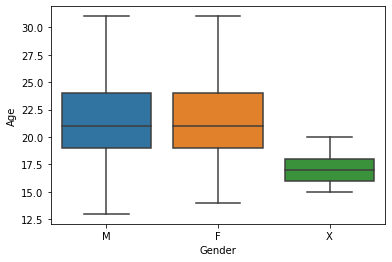

In [31]:
sns.boxplot(x="Gender", y="Age", data=gpa1)
plt.show()

In [ ]:
features correlation

In [72]:
gpa2.corr()

StudentID  SchoolYear  SchoolCode     Grade  ELLServed  \
StudentID          1.000000    0.462399    0.084177 -0.094578   0.273226   
SchoolYear         0.462399    1.000000   -0.036734  0.062206  -0.002118   
SchoolCode         0.084177   -0.036734    1.000000  0.056502   0.177579   
Grade             -0.094578    0.062206    0.056502  1.000000  -0.001711   
ELLServed          0.273226   -0.002118    0.177579 -0.001711   1.000000   
SpecialEducation  -0.078722    0.009816    0.090025 -0.008524   0.058110   
Section504Flag    -0.018226    0.064404   -0.020290  0.010222  -0.063886   
AAM               -0.000708   -0.036356    0.123631  0.016467   0.070386   
SOCFFEJ            0.040240   -0.055496    0.196081  0.027685   0.223615   
Race               0.071348    0.031992    0.087533 -0.006138   0.097798   
HighlyCapable     -0.018863    0.170495   -0.081743 -0.032089  -0.074178   
AdvancedLearning  -0.006228    0.262032   -0.112977 -0.079032  -0.104341   
FreeReducedLunch   0.013524   -0.082855    0.178335  0.009882   0.236237   
Gender            -0.010486   -0.006705    0.037488 -0.009960   0.034659   
Age               -0.446980   -0.900855    0.116519  0.307721   0.052083   
GPA                0.022855    0.149914   -0.231597  0.003172  -0.095488   
CreditsEarned     -0.105905    0.069947   -0.104905  0.839306   0.014131   

                  SpecialEducation  Section504Flag       AAM   SOCFFEJ  \
StudentID                -0.078722       -0.018226 -0.000708  0.040240   
SchoolYear                0.009816        0.064404 -0.036356 -0.055496   
SchoolCode                0.090025       -0.020290  0.123631  0.196081   
Grade                    -0.008524        0.010222  0.016467  0.027685   
ELLServed                 0.058110       -0.063886  0.070386  0.223615   
SpecialEducation          1.000000       -0.071514  0.121335  0.092745   
Section504Flag           -0.071514        1.000000 -0.052785 -0.115241   
AAM                       0.121335       -0.052785  1.000000  0.388586   
SOCFFEJ                   0.092745       -0.115241  0.388586  1.000000   
Race                      0.025229       -0.068993 -0.088319  0.282467   
HighlyCapable            -0.079657        0.052540 -0.077672 -0.172401   
AdvancedLearning         -0.114376        0.053552 -0.103530 -0.224823   
FreeReducedLunch          0.126179       -0.116236  0.244147  0.484328   
Gender                    0.117783        0.000643  0.338913  0.013623   
Age                       0.016398       -0.062951  0.062771  0.090227   
GPA                      -0.210351       -0.010500 -0.263264 -0.341731   
CreditsEarned            -0.050686        0.003678 -0.034542 -0.019049   

                      Race  HighlyCapable  AdvancedLearning  FreeReducedLunch  \
StudentID         0.071348      -0.018863         -0.006228          0.013524   
SchoolYear        0.031992       0.170495          0.262032         -0.082855   
SchoolCode        0.087533      -0.081743         -0.112977          0.178335   
Grade            -0.006138      -0.032089         -0.079032          0.009882   
ELLServed         0.097798      -0.074178         -0.104341          0.236237   
SpecialEducation  0.025229      -0.079657         -0.114376          0.126179   
Section504Flag   -0.068993       0.052540          0.053552         -0.116236   
AAM              -0.088319      -0.077672         -0.103530          0.244147   
SOCFFEJ           0.282467      -0.172401         -0.224823          0.484328   
Race              1.000000      -0.067752         -0.081488          0.221708   
HighlyCapable    -0.067752       1.000000          0.708181         -0.179034   
AdvancedLearning -0.081488       0.708181          1.000000         -0.232202   
FreeReducedLunch  0.221708      -0.179034         -0.232202          1.000000   
Gender           -0.005517       0.014120         -0.001332          0.010059   
Age              -0.022654      -0.177193         -0.281428          0.110959   
GPA              -0.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\zhang\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-71-ae71d556598f>", line 3, in <module>
    plt.savefig('data/gpa_features_corr.png', transparent=True,dpi=300, bbox_inches='tight')
  File "C:\Users\zhang\anaconda3\lib\site-packages\matplotlib\pyplot.py", line 729, in savefig
    res = fig.savefig(*args, **kwargs)
  File "C:\Users\zhang\anaconda3\lib\site-packages\matplotlib\figure.py", line 2180, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "C:\Users\zhang\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 2065, in print_figure
    **kwargs)
  File "C:\Users\zhang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 527, in print_png
    FigureCanvasAgg.draw(self)
  File "C:\Users\zhang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 388, in draw
 

KeyboardInterrupt: 

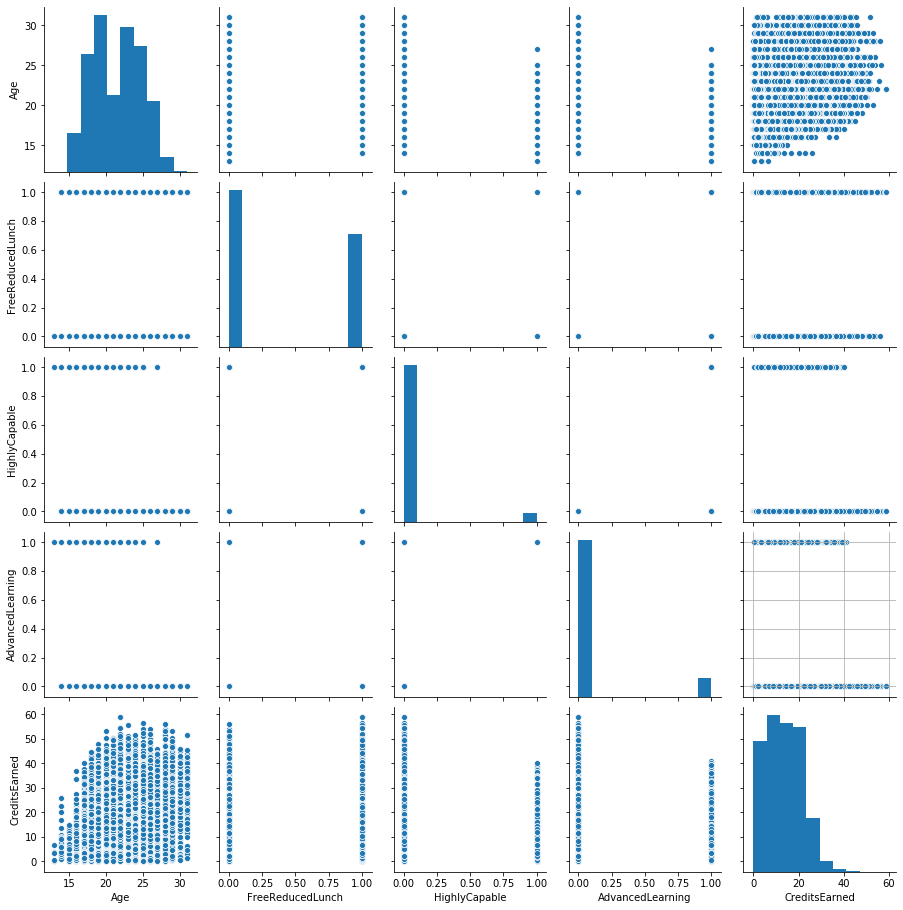

In [71]:
sns.pairplot(gpa2[['Race','Gender','Age','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM','HighlyCapable','AdvancedLearning','CreditsEarned']])
plt.grid(b=None)
plt.savefig('data/gpa_features_corr.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

In [25]:
##scatter plots of all correlation
feature_cols =['Race','Gender','Grade','Age','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM','HighlyCapable','AdvancedLearning','CreditsEarned']

KeyboardInterrupt: 

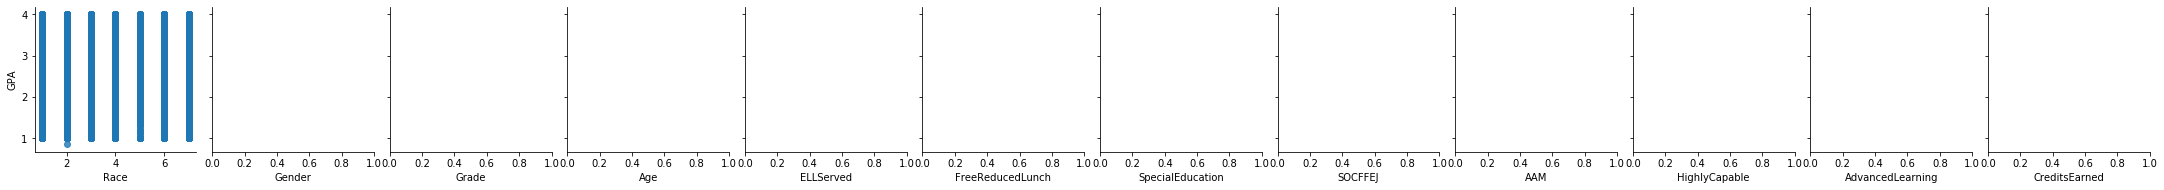

In [17]:
sns.pairplot(gpa2, x_vars=feature_cols, y_vars='GPA', kind='reg');
plt.grid(b=None)
plt.savefig('data/gpa_corr.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


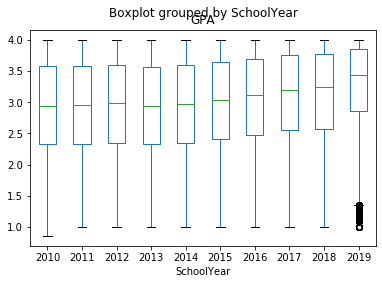

In [62]:
gpa2.boxplot(column='GPA', by='SchoolYear')
plt.grid(b=None)
plt.savefig('data/gpat_box.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

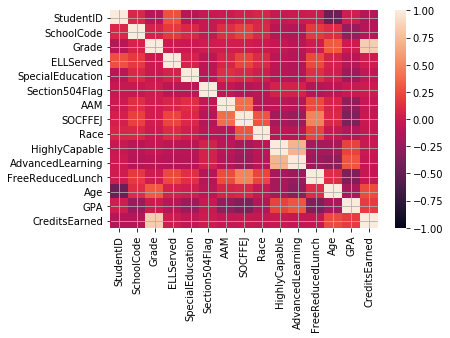

In [61]:
sns.heatmap(gpa2.drop(['SchoolYear'],axis = 1).corr(), vmin=-1, vmax=1)
plt.savefig('data/heatmap.png', transparent=True,dpi=300, bbox_inches='tight')
plt.grid(b=None)
plt.show()

Statistical analysis on strong predictors

In [73]:
# Create X and y.
feature_cols =['Race','Gender','Grade','Age','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM','HighlyCapable','AdvancedLearning','CreditsEarned']
X = gpa2[feature_cols]
y = gpa2.GPA

In [74]:
X1 = sm.add_constant(X)
est = sm.OLS(y, X1)
est2 = est.fit()
print(est2.summary())
pdf.output("data/regression.pdf")

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:13:30   Log-Likelihood:            -3.6199e+05
No. Observations:              404204   AIC:                         7.240e+05
Df Residuals:                  404191   BIC:                         7.241e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.7296      0.014  

NameError: name 'pdf' is not defined

In [ ]:
ML_Linear Regression Algorithm

In [104]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.model_selection import KFold

In [75]:
X.describe()

Race         Gender          Grade            Age  \
count  404204.000000  404204.000000  404204.000000  404204.000000   
mean        2.413601       0.515208      10.538223      21.417579   
std         1.638113       0.500363       1.138482       3.177050   
min         1.000000       0.000000       9.000000      13.000000   
25%         1.000000       0.000000       9.000000      19.000000   
50%         2.000000       1.000000      11.000000      21.000000   
75%         3.000000       1.000000      12.000000      24.000000   
max         7.000000       2.000000      12.000000      31.000000   

           ELLServed  FreeReducedLunch  SpecialEducation        SOCFFEJ  \
count  404204.000000     404204.000000     404204.000000  404204.000000   
mean        0.086006          0.417255          0.136040       0.447613   
std         0.280373          0.493106          0.342832       0.497249   
min         0.000000          0.000000          0.000000       0.000000   
25%         0.000000          0.000000          0.000000       0.000000   
50%         0.000000          0.000000          0.000000       0.000000   
75%         0.000000          1.000000          0.000000       1.000000   
max         1.000000          1.000000          1.000000       1.000000   

                 AAM  HighlyCapable  AdvancedLearning  CreditsEarned  
count  404204.000000  404204.000000     404204.000000  404204.000000  
mean        0.109019       0.055244          0.104420      13.327101  
std         0.311664       0.228457          0.305805       7.888160  
min         0.000000       0.000000          0.000000       0.020000  
25%         0.000000       0.000000          0.000000       6.250000  
50%         0.000000       0.000000          0.000000      12.750000  
75%         0.000000       0.000000          0.000000      19.500000  
max         1.000000       1.000000          1.000000      58.750000

In [76]:
print(X.dtypes)

Race                  int64
Gender                int64
Grade                 int64
Age                   int64
ELLServed             int64
FreeReducedLunch    float64
SpecialEducation      int64
SOCFFEJ               int64
AAM                   int64
HighlyCapable         int64
AdvancedLearning      int64
CreditsEarned       float64
dtype: object


In [77]:
print(X.shape)

(404204, 12)


In [78]:
y.isnull().sum()

0

In [79]:
y.fillna(0, inplace=True)

In [80]:
y.isnull().sum()

0

In [81]:
y.describe

<bound method NDFrame.describe of 0         4.000
1         4.000
2         3.747
3         3.747
4         4.000
          ...  
819317    4.000
819323    4.000
819326    2.600
819327    2.250
819328    4.000
Name: GPA, Length: 404204, dtype: float64>

In [82]:
# Check y's type.
y.dtypes

dtype('float64')

In [83]:
y.shape

(404204,)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(lr.intercept_)
print(lr.coef_)

5.729615918497455
[-0.01162082 -0.17368235 -0.2413107  -0.02099393  0.02670561 -0.25751317
 -0.23343439 -0.22013238 -0.15075315  0.10256232  0.30323535  0.0466777 ]


In [89]:
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state = 123)
y_pred = lr.predict(X)
X_pred = lr.predict(X)

In [90]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
## calcuate the accuracy
lr.score(x_test,y_test)

0.32373011896121723

In [112]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(gpa2, feature_cols):
    X = gpa2[feature_cols]
    y = gpa2.GPA
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            

In [113]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_mae(gpa2, feature_cols1):
    X = gpa2[feature_cols]
    y = gpa2.GPA
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return metrics.mean_absolute_error(y_test, y_pred)

Compare different sets of features.

In [114]:
print(train_test_rmse(gpa2, ['Race','Gender','Grade','Age','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM','HighlyCapable','AdvancedLearning','CreditsEarned']))
print(train_test_rmse(gpa2, ['Gender','Grade','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM']))
print(train_test_rmse(gpa2, ['Race','Gender','Grade','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM']))

0.596258571959718
0.6446631968323406
0.6443600609363697


In [111]:
print(train_test_mae(gpa2, ['Race','Gender','Grade','Age','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM','HighlyCapable','AdvancedLearning','CreditsEarned']))
print(train_test_mae(gpa2, ['Gender','Grade','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM']))
print(train_test_mae(gpa2, ['Race','Gender','Grade','ELLServed','FreeReducedLunch','SpecialEducation','SOCFFEJ','AAM']))

0.4858513713019563
0.4858513713019563
0.4858513713019563


In [115]:
print(lr.intercept_)
print(lr.coef_)

5.717658880971726
[-0.01155409 -0.17537453 -0.23973849 -0.02107396  0.02736365 -0.2596646
 -0.23244947 -0.22085447 -0.14801109  0.10535966  0.30416243  0.04656266]


In [116]:
## RMSEA reduced wtih more features

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

y_null = np.zeros_like(y_test, dtype=float)

y_null.fill(y_test.mean())
y_null

array([3.02491384, 3.02491384, 3.02491384, ..., 3.02491384, 3.02491384,
       3.02491384])

In [118]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.7250611119914101

feature engineering

In [124]:
gpa_dummies = pd.get_dummies(gpa2.Race)

In [125]:
gpa_dummies = pd.concat([gpa2, gpa_dummies], axis=1)

Ridge Regression Regularization

In [126]:
X = gpa_dummies[feature_cols]
y = gpa_dummies.GPA

linreg = LinearRegression()
linreg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ridge regression

In [127]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5932344351810799


In [128]:
y_pred = ridgereg.predict(X)

In [129]:
print(ridgereg.intercept_)

5.725267956040865


In [130]:
list(zip(feature_cols, ridgereg.coef_))

[('Race', -0.012072455992338802),
 ('Gender', -0.17189375745468874),
 ('Grade', -0.23970372882449337),
 ('Age', -0.021451648629833384),
 ('ELLServed', 0.02488225740870185),
 ('FreeReducedLunch', -0.25715759271676475),
 ('SpecialEducation', -0.23200360036349318),
 ('SOCFFEJ', -0.2205105337691541),
 ('AAM', -0.1508911981911958),
 ('HighlyCapable', 0.10134105825030529),
 ('AdvancedLearning', 0.3032948476625757),
 ('CreditsEarned', 0.04649019312062045)]

In [131]:
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5978285354252588


In [132]:
list(zip(feature_cols, ridgereg.coef_))

[('Race', -0.014266838213527236),
 ('Gender', -0.15931463649301347),
 ('Grade', -0.1347250577338514),
 ('Age', -0.02182512213650752),
 ('ELLServed', 0.021039820609851052),
 ('FreeReducedLunch', -0.24215956709389638),
 ('SpecialEducation', -0.22868375367778698),
 ('SOCFFEJ', -0.21065339583369258),
 ('AAM', -0.17372494957509252),
 ('HighlyCapable', 0.12353455471975786),
 ('AdvancedLearning', 0.2852648696521384),
 ('CreditsEarned', 0.03076569025457894)]

conclusion

predicting performance per course with the Neural Network

e Neural Network is trained on the data of each course individually and
its classification accuracy and recall are measured for each course. This in order to determine if there is an advantage to training the network on all the data or on data for each individual course as well as examining the differences in predictive performance between courses.

The feature importance statistics from Figure 3 extracted from the Random Forest Classifier give a better insight in how certain features influence the ability of the classifier to predict the correct labels. One feature that stood out in these statistics was the regularity measure, which is a representation of how regularly a student accessed the course page and its content over the duration of the course. It obtained the highest ranking with 12.9%, meaning that knowledge of the regularity of page access is the relative best predictor for student performance when the classifier is trained on a wide variety of courses. Quiz grades placed eighth, with 8.7% which is relatively high, given the fact that these grades are only available for approximately half the students, thus indicating that they are potentially important predictors for student performance.
The other previous grade predictor, assignment grades, only obtained an importance score of 0.4%. This low score could largely be attributed to the fact that this predictor is only available for 2 out of the 17 courses. The Couse ID predictor was ranked ninth in terms of feature importance with 5.5%, this makes it of relatively low importance compared to the eight other predictors ranked above it.

Compared to the performance of the Neural Network in experiment 1, which obtained an accuracy of 66.1% and recall of 84.9%, some course classifiers obtained a clear performance increase. The classifier for Intro to Psychology obtained an accuracy of 89.3% with a recall of 76.1%. 